In [1]:
from os import path
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud,  STOPWORDS
import re
import nltk
from nltk.tokenize import WordPunctTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/valeria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/valeria/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/valeria/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
def my_language_processing(text):
    
    # initial proc
    
    text = text.replace("""This article uses material from the Wikipedia article <a href="https://en.wikipedia.org/wiki/Musicophilia">"Musicophilia"</a>, 
which is released under the <a href="https://creativecommons.org/licenses/by-sa/3.0/">Creative Commons Attribution-Share-Alike License 3.0</a>
""","")
    

    # Get the list of stop words
    stop_words = stopwords.words('english')
    # # add new stopwords to the list
    stop_words.extend(["wiki","wikipedia","oliver","sacks","sack"])

    
    # tokenize
    
    word_punct_tokens = set(WordPunctTokenizer().tokenize(text)) # get unique tokens
    
    
    # clean for punctuation and the like
    
    clean_tokens=[]
    for token in word_punct_tokens:
        # remove any value that are not alphabetical   
        new_token = re.sub(r'[^a-zA-Z]+', '', token) 
        new_token = re.sub(r'\\u','', new_token)
        # remove empty value and single character value
        if new_token != "" and len(new_token) >= 2: 
            vowels=len([v for v in new_token if v in "aeiouAEIOU"])
            if vowels != 0: # remove line that only contains consonants
                clean_tokens.append(new_token)
                
                
    # effort to keep US as the country

    clean_tokens_us = []
    for token in clean_tokens:
        if token!="US":
            clean_tokens_us.append(token.lower())
        else:
            clean_tokens_us.append(token)
            
            
    # Remove the stopwords from the list of tokens
    clean_tokens_us_nostop = [x.lower() for x in clean_tokens_us if x not in stop_words]
    
    
    # lemmatize
    
    # Create lemmatizer object: Text augmentation
    lemmatizer = WordNetLemmatizer()
    # Lemmatize each word and display the output
    lemmatize_text = []
    for word in clean_tokens_us_nostop:
        word_unique = lemmatizer.lemmatize(word, pos='n')
        #output = [word, lemmatizer.lemmatize(word, pos='n'), lemmatizer.lemmatize(word, pos='a'),lemmatizer.lemmatize(word, pos='v')]
        #for word_unique in set(output):
        if len(word_unique)>1:
            lemmatize_text.append(word_unique)
                
                
    return list(set(lemmatize_text))


def tweet_data_generator(tweet_list):
    

    for tweet_text in tweet_list:

        # one tweet
        
        tweet_dict = {}
        tweet_dict["tweet_text_raw"] = tweet_text
        tweet_dict["tweet_text_proc"] = my_language_processing(tweet_dict["tweet_text_raw"]) 

        yield tweet_dict

In [3]:
text = open('./input/ex1_proj2_corrected.txt').read()
text_parts = text.split("\n")

In [4]:
tgen = tweet_data_generator(text_parts)

text_preprocessed_list = []

# binary dataframe

textual_list = []

for tweet in tgen:  

    text_preprocessed_list.append(tweet["tweet_text_proc"])

    tweet_dict = {}  

    for word in tweet["tweet_text_proc"]:
        tweet_dict[word] = int(1)


    textual_list.append(tweet_dict)

# get a textual matrix
textual_df = pd.DataFrame(textual_list)
textual_df.fillna(int(0), inplace = True)
textual_df


material   en  musicophilia  article   us  org  href  released  \
0        1.0  1.0           1.0      1.0  1.0  1.0   1.0       0.0   
1        0.0  0.0           0.0      0.0  0.0  1.0   1.0       1.0   
2        0.0  0.0           0.0      0.0  0.0  0.0   0.0       0.0   
3        0.0  0.0           0.0      0.0  0.0  0.0   0.0       0.0   
4        0.0  0.0           1.0      0.0  0.0  0.0   0.0       0.0   
..       ...  ...           ...      ...  ...  ...   ...       ...   
93       0.0  0.0           0.0      0.0  0.0  0.0   0.0       0.0   
94       0.0  0.0           0.0      0.0  0.0  0.0   0.0       0.0   
95       0.0  0.0           0.0      0.0  0.0  0.0   0.0       0.0   
96       0.0  0.0           0.0      0.0  0.0  0.0   0.0       0.0   
97       0.0  0.0           0.0      0.0  0.0  0.0   0.0       0.0   

    creativecommons  attribution  ...  therapeutic  involuntarily  motion  \
0               0.0          0.0  ...          0.0            0.0     0.0   
1               1.0          1.0  ...          0.0            0.0     0.0   
2               0.0          0.0  ...          0.0            0.0     0.0   
3               0.0          0.0  ...          0.0            0.0     0.0   
4               0.0          0.0  ...          0.0            0.0     0.0   
..              ...          ...  ...          ...            ...     ...   
93              0.0          0.0  ...          0.0            0.0     0.0   
94              0.0          0.0  ...          0.0            0.0     0.0   
95              0.0          0.0  ...          0.0            0.0     0.0   
96              0.0          0.0  ...          0.0            0.0     0.0   
97              0.0          0.0  ...          0.0            0.0     0.0   

    interaction  feeling  expression  becomes  vehicle  susceptibility  \
0           0.0      0.0         0.0      0.0      0.0             0.0   
1           0.0      0.0         0.0      0.0      0.0             0.0   
2           0.0      0.0         0.0      0.0      0.0             0.0   
3           0.0      0.0         0.0      0.0      0.0             0.0   
4           0.0      0.0         0.0      0.0      0.0             0.0   
..          ...      ...         ...      ...      ...             ...   
93          1.0      1.0         1.0      1.0      1.0             1.0   
94          0.0      0.0         0.0      0.0      0.0             0.0   
95          0.0      0.0         0.0      0.0      0.0             0.0   
96          0.0      0.0         0.0      0.0      0.0             0.0   
97          0.0      0.0         0.0      0.0      0.0             0.0   

    language  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
..       ...  
93       1.0  
94       0.0  
95       0.0  
96       0.0  
97       0.0  

[98 rows x 428 columns]

In [5]:
# count of most common words

words_sorted_counts = textual_df.sum(axis=0).sort_values().reset_index()
df_words_output = words_sorted_counts.iloc[-10:].copy()
df_words_output.columns = ["Word","Frequency"]



In [6]:
text_preprocessed = " ".join([" ".join(text) for text in text_preprocessed_list])


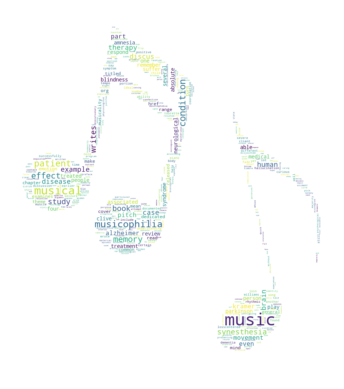

In [7]:



stopwords = set(STOPWORDS)

# read the mask image
alice_mask = np.array(Image.open(path.join("./input", "music_note_mask.jpg")))

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords, contour_width=0, contour_color='steelblue', width = 1300, height = 600)

# generate word cloud
wc.generate(text_preprocessed)

# store to file
wc.to_file(path.join("", "./output/music_wc.png"))

# show
# plt.subplots(fig_size = (15,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [8]:
# Export summary

df_markdown = df_words_output.to_markdown(index=False)
output = open('./output/text_analysis_output.md',"w")

output.write("# Music \n\n## Most frequent words \n\n")
output.write(df_markdown)
output.write("\n\n# A musical wordcloud \n\n")
output.write("![](./music_wc.png)")
output.close()
